In [24]:
import numpy as np

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense
import matplotlib.pyplot as plt

In [26]:
sequence = np.array([i for i in range(1,101)])
window_size = 3
X =[]
y =[]

In [27]:
for i in range(len(sequence)-window_size):
    X.append(sequence[i:i + window_size])
    y.append(sequence[i + window_size])
X=np.array(X)
y=np.array(y)
X=X.reshape((X.shape[0],X.shape[1],1))

In [29]:
model = Sequential()
model.add(SimpleRNN(50, activation='relu',input_shape=(window_size,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.fit(X,y, epochs=500, verbose=0)
print("Training complete")

Training complete


In [33]:
test_input=np.array([8,9,10])
test_input=test_input.reshape((1,window_size,1))
predicted = model.predict(test_input,verbose=0)
print(f"predicted next number: {predicted[0][0]:.2f}")


predicted next number: 11.00


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  


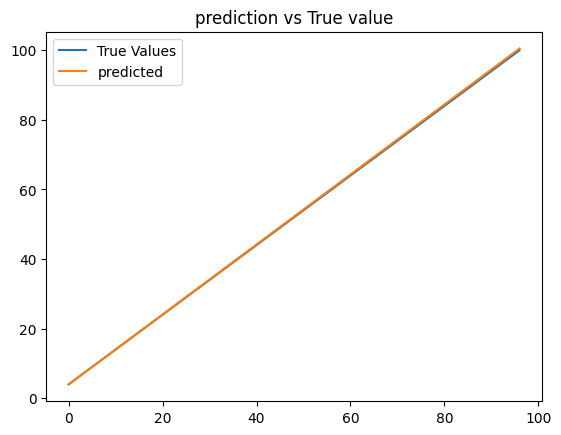

In [34]:
predictions=model.predict(X)
plt.plot(y,label='True Values')
plt.plot(predictions,label='predicted')
plt.legend()
plt.title("prediction vs True value")
plt.show()


In [35]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(model,f)

In [39]:
with open('/content/model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [40]:
# Define your input sequence here (e.g., [11, 12, 13])
my_input = np.array([11, 12, 13])

# Reshape the input to match the model's expected input shape
my_input = my_input.reshape((1, window_size, 1))

# Get the prediction from the loaded model
my_prediction = loaded_model.predict(my_input)

# Print the prediction
print(f"Input: {my_input.flatten()}")
print(f"Predicted output: {my_prediction[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Input: [11 12 13]
Predicted output: 14.020792961120605


In [41]:
model.save("model.h5")

In [42]:
model.save("model.keras")